<a href="https://colab.research.google.com/github/Praveenku32k/Python_40_works_day_to_day/blob/main/Copy_of_Classifier_using_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ROOT="/content/drive/MyDrive/Artifical_Neural_Network_class_Lab"

In [ ]:
import os
os.chdir(ROOT)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Artifical_Neural_Network_class_Lab'

*Building an Image classifier using Sequential API*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
import tensorflow as tf
from tensorflow import keras 

USING KERAS TO LOAD THE DATASETS

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:

X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0 # As we are dealing with the images that why we are dividing by 255pixels.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [ ]:
print(y_train_full.shape)

(60000,)


In [ ]:
print(y_train[0])

4


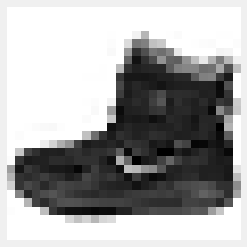

In [ ]:
img = X_train_full[0]

plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

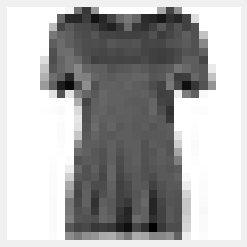

In [ ]:
img = X_train_full[10]

plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

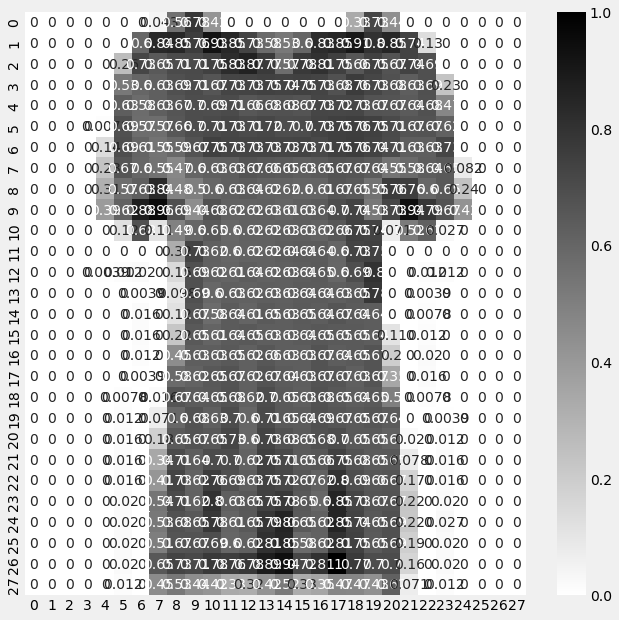

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(img/255, annot=True, cmap="binary")

Creating the model using sequential API

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Flatten(input_shape=[28,28]),
                               keras.layers.Dense(300,activation="relu"),
                               keras.layers.Dense(100,activation="relu"),
                               keras.layers.Dense(10,activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1=model.layers[1]

In [ ]:
hidden1.name

'dense_3'

In [ ]:
model.get_layer('dense_3') is hidden1

True

In [ ]:
weights,biases=hidden1.get_weights()

In [ ]:
print(weights)

[[ 0.06201863  0.0213573   0.05339643 ... -0.04675909 -0.02445745
  -0.07189926]
 [ 0.03911585 -0.03270926  0.07284793 ...  0.07315448  0.06887273
   0.05256994]
 [-0.06229116  0.00998331  0.05787662 ... -0.00943315 -0.05103514
  -0.00261711]
 ...
 [-0.01178233 -0.03208893 -0.03198016 ...  0.04373194  0.04963508
  -0.01242641]
 [-0.00232025  0.07199451  0.0614498  ...  0.03004815  0.01929314
   0.03818176]
 [ 0.00514087  0.06344171  0.01144297 ... -0.05533966  0.01790853
  -0.00220038]]


In [ ]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

Compiling the models

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Training and evaluatiing the models

In [ ]:
#now model is ready to trained . for this we simply need to call this fit() function or method........
history=model.fit(X_train,y_train,epochs=30,
                  validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7152 - accuracy: 0.7619 - val_loss: 0.4960 - val_accuracy: 0.8408
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4880 - accuracy: 0.8300 - val_loss: 0.4444 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4425 - accuracy: 0.8451 - val_loss: 0.4125 - val_accuracy: 0.8634
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4146 - accuracy: 0.8545 - val_loss: 0.4053 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3930 - accuracy: 0.8629 - val_loss: 0.3774 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3768 - accuracy: 0.8670 - val_loss: 0.3827 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3633 - accuracy: 0.8727 - val_loss: 0.3693 - val_accuracy:

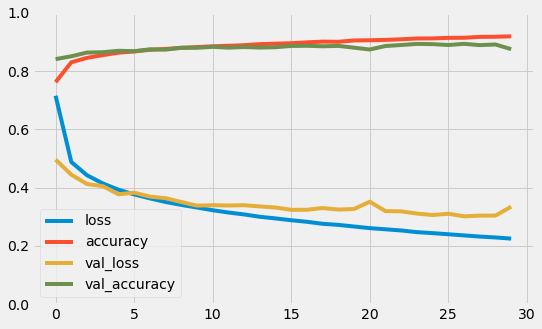

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

plt.gca().set_ylim(0,1)# set the vertical range 0-1
plt.show()


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 62.5457 - accuracy: 0.8522


[62.54567337036133, 0.8521999716758728]